Exemple <br>
Demo 1<br>
Problema<br>
identificarea punctului de optim a unei functii reale<br>
    - functia sfera<br>
    - functia Rastrigin<br>


Function ladscape<br>
Define the function and plot it in order to observe its shape/aspect and optimal points

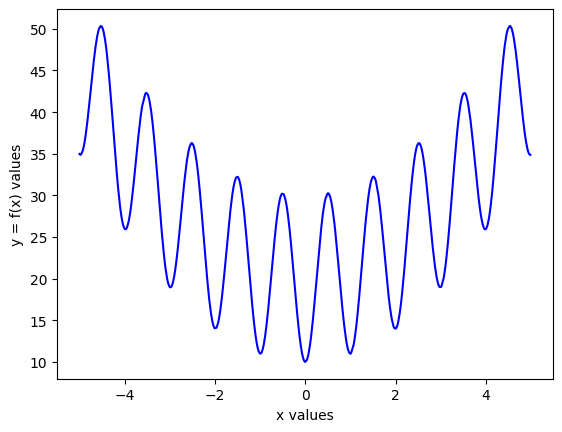

In [1]:
# define the function
import math
import numpy as np

MIN = -5
MAX = 5

def fcEval(x):
    # sphere function
    # val = sum(xi ** 2 for xi in x)

    # Rastrigin function
    term1 = sum(xi ** 2 / 4000 for xi in x)
    cosinus = np.cos([xi for xi in x])
    cosinus = [cosinus[i] / math.sqrt(i + 1) for i in range(len(x))]
    term2 = np.prod([c for c in cosinus], axis = 0)
    val = term1 - term2 + 1
    val = 20 + sum(xi ** 2 - 10 * np.cos(2 * np.pi * xi) for xi in x)

    return val

# define a generator of values
from random import uniform, randint
from fcOptimisation.utils import generateNewValue

#  plot the 1D function (n = 1) (see how the search space looks)
import matplotlib.pyplot as plt

noDim = 1
xref =  [[generateNewValue(MIN, MAX)  for _ in range(noDim)] for _ in range(0, 1000)]
xref.sort()
yref = [fcEval(xi) for xi in xref]

plt.plot(xref, yref, 'b-')
plt.xlabel('x values')
plt.ylabel('y = f(x) values')
plt.show()

GA running <br>

Use the GA (with real encoding) for identify the optimal solution

In [3]:
from random import randint

class GA:
    def __init__(self, param = None, problParam = None):
        self.__param = param
        self.__problParam = problParam
        self.__population = []

    @property
    def population(self):
        return self.__population

    def initialisation(self):
        for _ in range(0, self.__param['popSize']):
            c = Chromosome(self.__problParam)
            self.__population.append(c)

    def evaluation(self):
        for c in self.__population:
            c.fitness = self.__problParam['function'](c.repres)

    def bestChromosome(self):
        best = self.__population[0]
        for c in self.__population:
            if (c.fitness < best.fitness):
                best = c
        return best

    def worstChromosome(self):
        best = self.__population[0]
        for c in self.__population:
            if (c.fitness > best.fitness):
                best = c
        return best

    def selection(self):
        pos1 = randint(0, self.__param['popSize'] - 1)
        pos2 = randint(0, self.__param['popSize'] - 1)
        if (self.__population[pos1].fitness < self.__population[pos2].fitness):
            return pos1
        else:
            return pos2


    def oneGeneration(self):
        newPop = []
        for _ in range(self.__param['popSize']):
            p1 = self.__population[self.selection()]
            p2 = self.__population[self.selection()]
            off = p1.crossover(p2)
            off.mutation()
            newPop.append(off)
        self.__population = newPop
        self.evaluation()

    def oneGenerationElitism(self):
        newPop = [self.bestChromosome()]
        for _ in range(self.__param['popSize'] - 1):
            p1 = self.__population[self.selection()]
            p2 = self.__population[self.selection()]
            off = p1.crossover(p2)
            off.mutation()
            newPop.append(off)
        self.__population = newPop
        self.evaluation()

    def oneGenerationSteadyState(self):
        for _ in range(self.__param['popSize']):
            p1 = self.__population[self.selection()]
            p2 = self.__population[self.selection()]
            off = p1.crossover(p2)
            off.mutation()
            off.fitness = self.__problParam['function'](off.repres)
            worst = self.worstChromosome()
            if (off.fitness < worst.fitness):
                worst = off

In [4]:
def plotAFunction(xref, yref, x, y, xoptimal, yoptimal, message):
    plt.plot(xref, yref, 'b-')
    plt.plot(x, y, 'ro', xoptimal, yoptimal, 'bo')
    plt.title(message)
    plt.show()
    plt.pause(0.9)
    plt.clf()

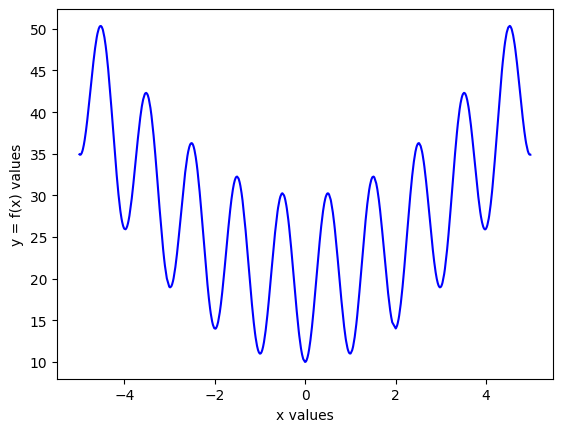

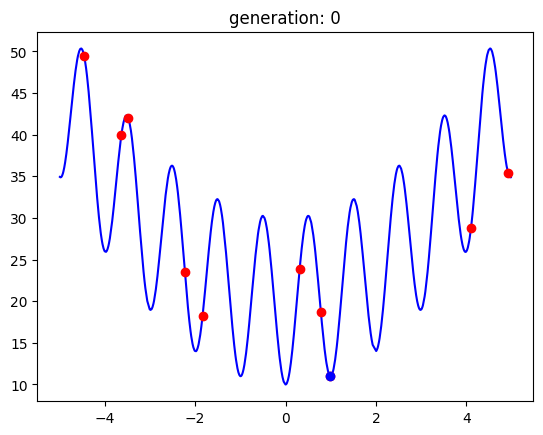

Best solution in generation 0 is: x = [1.1328125] f(x) = 14.567674611686064


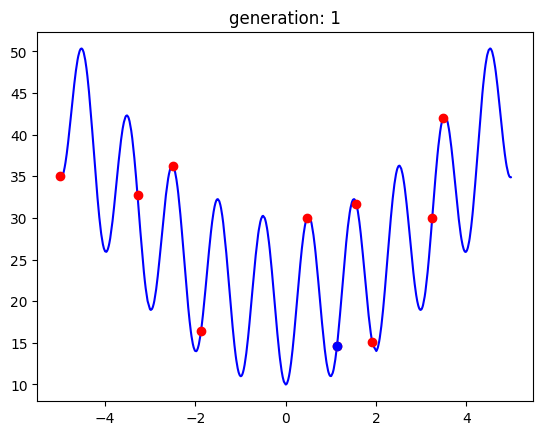

Best solution in generation 1 is: x = [0.9375] f(x) = 11.640110924887136


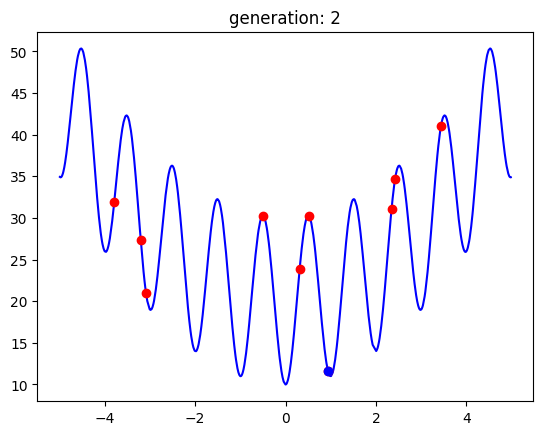

Best solution in generation 2 is: x = [0.15625] f(x) = 14.468711732303976


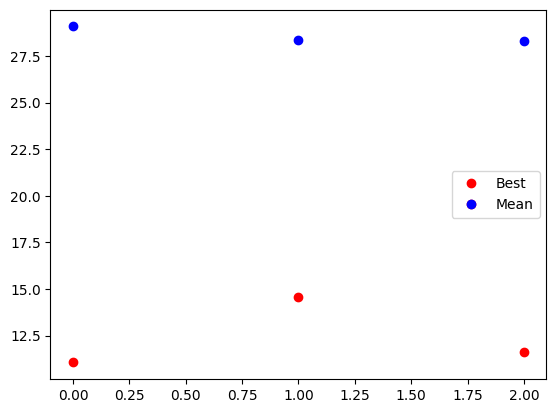

In [5]:
# from fcOptimisGA.RealChromosome import Chromosome
from fcOptimisation.BinChromosome import Chromosome
from random import seed

seed(1)

# plot the function to be optimised
noDim = 1
xref =  [[generateNewValue(MIN, MAX)  for _ in range(noDim)] for _ in range(0, 1000)]
xref.sort()
yref = [fcEval(xi) for xi in xref]
plt.ion()
plt.plot(xref, yref, 'b-')
plt.xlabel('x values')
plt.ylabel('y = f(x) values')
plt.show()

# initialise de GA parameters
gaParam = {'popSize' : 10, 'noGen' : 3, 'pc' : 0.8, 'pm' : 0.1}
# problem parameters
problParam = {'min' : MIN, 'max' : MAX, 'function' : fcEval, 'noDim' : noDim, 'noBits' : 8}

# store the best/average solution of each iteration (for a final plot used to anlyse the GA's convergence)
allBestFitnesses = []
allAvgFitnesses = []
generations = []


ga = GA(gaParam, problParam)
ga.initialisation()
ga.evaluation()

for g in range(gaParam['noGen']):
    #plotting preparation
    allPotentialSolutionsX = [c.repres for c in ga.population]
    allPotentialSolutionsY = [c.fitness for c in ga.population]
    bestSolX = ga.bestChromosome().repres
    bestSolY = ga.bestChromosome().fitness
    allBestFitnesses.append(bestSolY)
    allAvgFitnesses.append(sum(allPotentialSolutionsY) / len(allPotentialSolutionsY))
    generations.append(g)
    plotAFunction(xref, yref, allPotentialSolutionsX, allPotentialSolutionsY, bestSolX, [bestSolY], 'generation: ' + str(g))

    #logic alg
    ga.oneGeneration()
    # ga.oneGenerationElitism()
    # ga.oneGenerationSteadyState()

    bestChromo = ga.bestChromosome()
    print('Best solution in generation ' + str(g) + ' is: x = ' + str(bestChromo.repres) + ' f(x) = ' + str(bestChromo.fitness))

plt.ioff()
best, = plt.plot(generations, allBestFitnesses, 'ro', label = 'best')
mean, = plt.plot(generations, allAvgFitnesses, 'bo', label = 'mean')
plt.legend([best, (best, mean)], ['Best', 'Mean'])
plt.show()

Tema <br>
Problema: Identificarea comunitatilor in retele complexe <br>
Pentru o retea data si o impartire a nodurilor pe comunitati, sa se determine calitatea acestor comunitati folosind metrica de modularitate <br> (https://www.cs.cmu.edu/~ckingsf/bioinfo-lectures/modularity.pdf). Se va folosi un algoritm genetic.

Cateva info utile

incarcarea datelor despre o retea

In [6]:
# read the network details
def readNet(fileName):
    f = open(fileName, "r")
    net = {}
    n = int(f.readline())
    net['noNodes'] = n
    mat = []
    for i in range(n):
        mat.append([])
        line = f.readline()
        elems = line.split(" ")
        for j in range(n):
            mat[-1].append(int(elems[j]))
    net["mat"] = mat
    degrees = []
    noEdges = 0
    for i in range(n):
        d = 0
        for j in range(n):
            if (mat[i][j] == 1):
                d += 1
            if (j > i):
                noEdges += mat[i][j]
        degrees.append(d)
    net["noEdges"] = noEdges
    net["degrees"] = degrees
    f.close()
    return net

In [7]:
# load a network
import os

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'communityDetection', 'data', 'net.in')
network = readNet(filePath)

In [8]:
def from_numpy_matrix(A, create_using=None):
    """Recreation of the deprecated from_numpy_matrix function"""
    import numpy as np
    import networkx as nx

    A = np.asarray(A)
    G = nx.Graph() if create_using is None else create_using

    # Add nodes
    G.add_nodes_from(range(A.shape[0]))

    # Add edges
    # For undirected graphs, only need the upper triangle
    rows, cols = np.where(np.triu(A) != 0)
    edges = zip(rows.tolist(), cols.tolist())
    G.add_edges_from(edges)

    return G


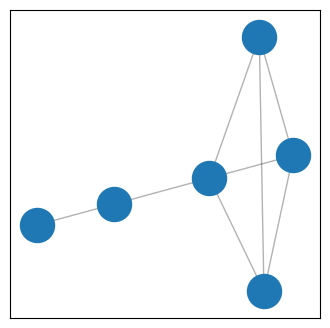

In [9]:
# plot the network
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore')

A=np.matrix(network["mat"])
#G=nx.from_numpy_matrix(A)
G=from_numpy_matrix(A)

pos = nx.spring_layout(G)  # compute graph layout
plt.figure(figsize=(4, 4))  # image is 8 x 8 inches
nx.draw_networkx_nodes(G, pos, node_size=600, cmap=plt.cm.RdYlBu)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show(G)



vizualizarea comunitatilor intr-o retea

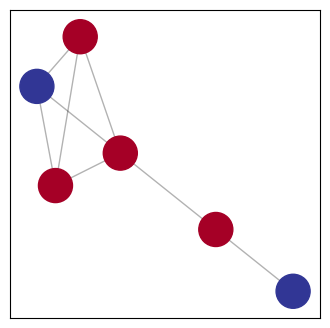

In [10]:
# plot a particular division in communities
communities = [1,2,1,2,1, 1]

A=np.matrix(network["mat"])
G= from_numpy_matrix(A)
#G=nx.from_numpy_matrix(A)

pos = nx.spring_layout(G)  # compute graph layout
plt.figure(figsize=(4, 4))  # image is 8 x 8 inches
nx.draw_networkx_nodes(G, pos, node_size = 600, cmap = plt.cm.RdYlBu, node_color = communities)
nx.draw_networkx_edges(G, pos, alpha = 0.3)
plt.show(G)

evaluarea impartirii pe comunitati


In [11]:
# evaluate the quality of previous communities inside a network
# https://www.cs.cmu.edu/~ckingsf/bioinfo-lectures/modularity.pdf

def modularity(communities, param):
    noNodes = param['noNodes']
    mat = param['mat']
    degrees = param['degrees']
    noEdges = param['noEdges']
    M = 2 * noEdges
    Q = 0.0
    for i in range(0, noNodes):
        for j in range(0, noNodes):
            if (communities[i] == communities[j]):
               Q += (mat[i][j] - degrees[i] * degrees[j] / M)
    return Q * 1 / M

print(modularity([1,2,1,2,1,1], network))

-0.125


TODO <br>
Dezvoltati un algoritm genetic care sa identifice comunitatile dintr-o retea complexa: <br>

stabilirea reprezentarii cromozomilor <br>
folosirea modularitatii ca si functie de fitnes (a se vedea mai sus) <br>
dezvoltarea operatorilor genetici <br>
rularea GA-ului si identificarea comunitatilor <br>
care sunt parametrii algoritmului pentru care se obtin rezultate performante? <br>
exista o solutie unica sau mai multe solutii? <br>